# パラメータの最適化

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch5/
%pwd

/content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch5


'/content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch5'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [ ]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

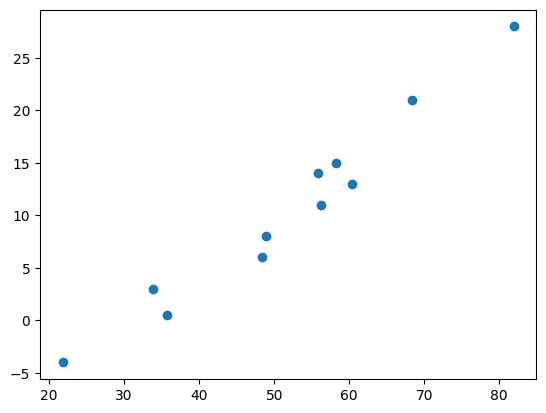

In [ ]:
plt.scatter(t_u, t_c)
plt.show()

In [ ]:
def model(t_u, w, b):
    return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
w = torch.ones(())
b = torch.zeros(())

In [ ]:
t_p = model(t_u, w, b)
loss = loss_fn(t_p, t_c)

In [ ]:
t_p, loss

(tensor([36.7000, 56.9000, 59.2000, 82.9000, 57.3000, 49.9000, 34.9000,
         22.8000, 49.4000, 61.4000, 69.4000]),
 tensor(1847.4844))

In [ ]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [ ]:
learning_rate = 1e-2 # 学習率
w = w - learning_rate * loss_rate_of_change_w

In [ ]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b-delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [ ]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [ ]:
def dmodel_dw(t_u, w, b):
    return t_u

In [ ]:
def dmodel_db(t_u, w, b):
    return 1.0

In [ ]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])   # 新しい次元を追加し連結

In [ ]:
# エポック：パラメータを更新する一回の繰り返し
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        print(grad)
        print(grad.shape)

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>

    return params

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>

    return params

In [ ]:
training_loop(
    n_epochs=100,
    learning_rate=1e-2,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch 1, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch 10, Loss 90901105189019073810297959556841472.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [ ]:
training_loop(
    n_epochs=100,
    learning_rate=1e-4,
    params=torch.tensor([1.0, 0.0]),
    t_u=t_u,
    t_c=t_c
)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [ ]:
# 重みとバイアスの勾配の差をなくすために入力を-1.0~1.0から離れないようにする
t_un = 0.1 * t_u
t_un

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800,
        4.8400, 6.0400, 6.8400])

In [ ]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [ ]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])
...
Epoch 4000, Loss 2.927680
    Params: tensor([  5.3643, -17.2853])
    Grad:   tensor([-0.0006,  0.0033])
Epoch 5000, Loss 2.927648
    Params: tensor([  5.3671, -17.3012])
    Grad:   tensor([-0.0001,  0.0006])


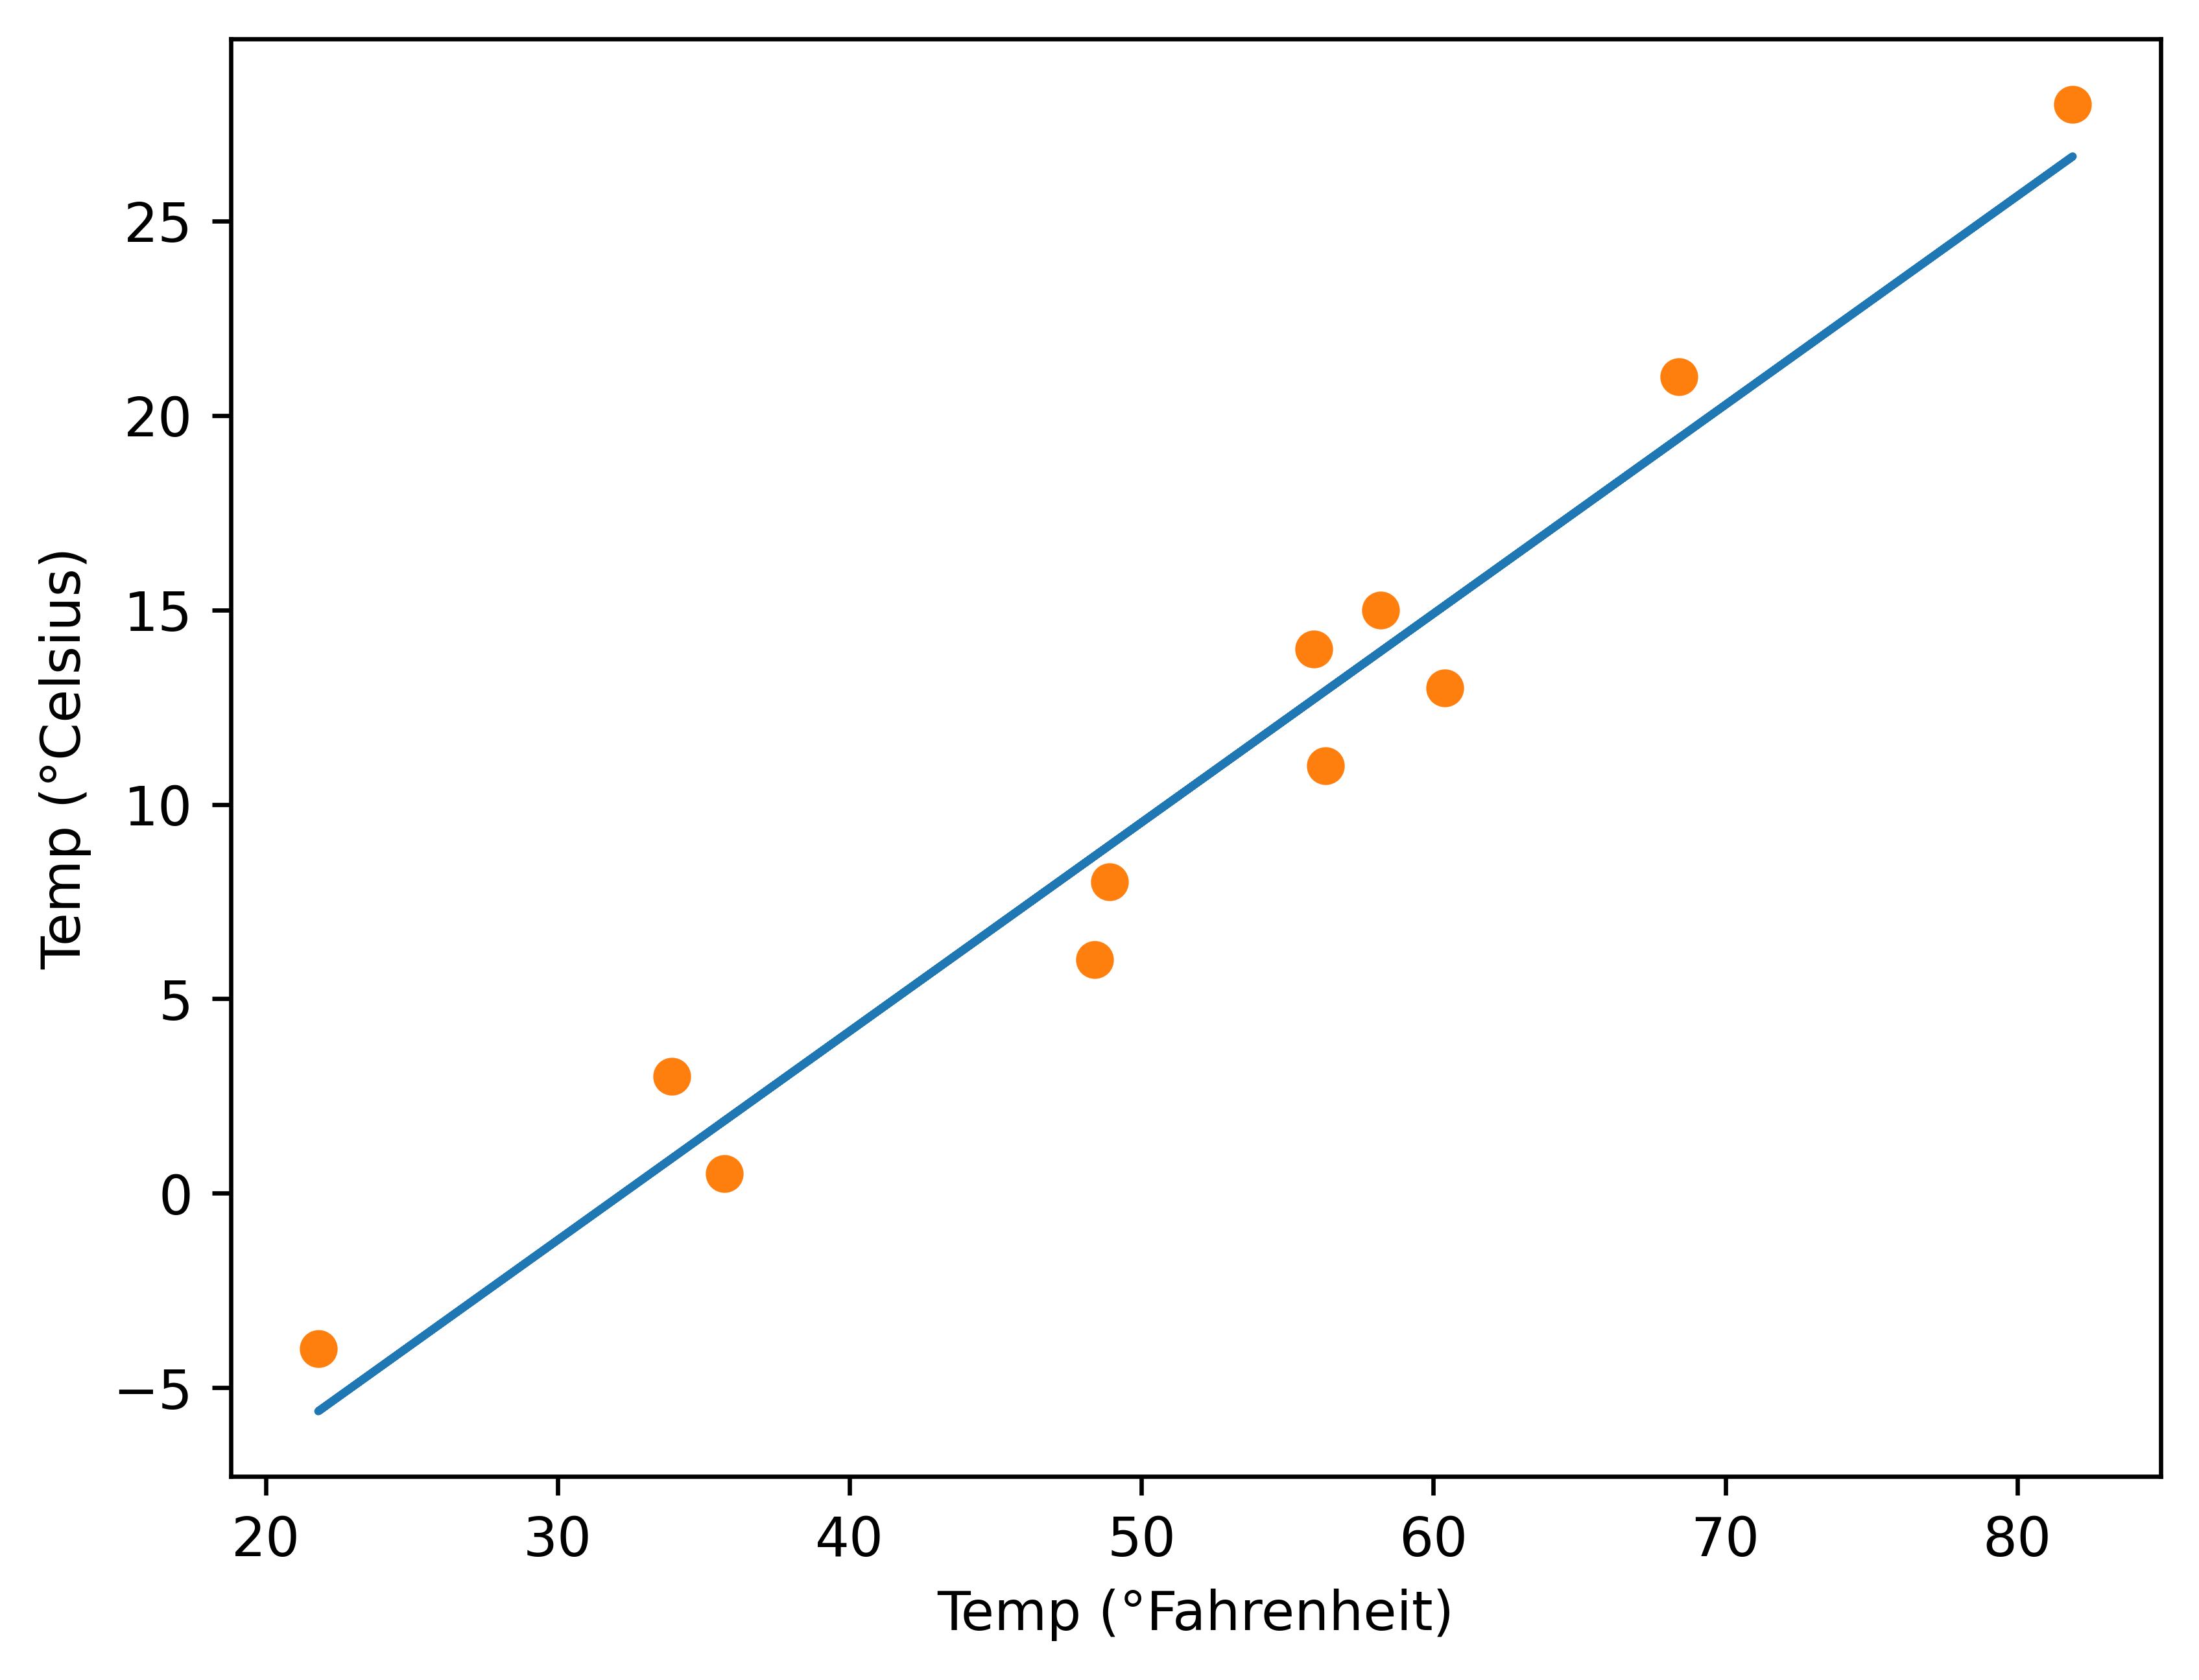

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel('Temp (°Fahrenheit)')
plt.ylabel('Temp (°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

# Autograd

In [ ]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [ ]:
def model(t_u, w, b):
    return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [ ]:
params.grad is None

True

In [ ]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

In [ ]:
# 一度backward()を呼び出すと、
# グラフのリーフノード(今回の場合だとw, b)に前の導関数が累積(合計)される
# 反復のループのたびに明示的に勾配をゼロにする必要がある
if params.grad is not None:
    params.grad.zero_()

In [ ]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad(): # autograd の無効化 (順伝播グラフにエッジを追加しない)
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, params %f' % (epoch, float(loss)))

    return params

In [ ]:
training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u=t_un,
    t_c= t_c
)

Epoch 500, params 7.860115
Epoch 1000, params 3.828538
Epoch 1500, params 3.092191
Epoch 2000, params 2.957698
Epoch 2500, params 2.933134
Epoch 3000, params 2.928648
Epoch 3500, params 2.927830
Epoch 4000, params 2.927679
Epoch 4500, params 2.927652
Epoch 5000, params 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

# 最適化関数

In [ ]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [ ]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [ ]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
import torch.optim as optim

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learing_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [ ]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward() # 逆伝播

optimizer.step() # 更新
# -> オプティマイザが params.grad の値を調べて
#    paramsのgradを更新し、params の値に対して
#    学習率を掛け算したgradの値を引き算して更新する

params

tensor([ 0.7421, -0.0047], requires_grad=True)

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
# 確率的勾配降下法(ミニバッチ勾配降下法)
optimizer = optim.SGD([params], lr=learning_rate)

In [ ]:
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([ 2.3232, -0.0710], requires_grad=True)

In [ ]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad() # 勾配をリセット(0化)
        loss.backward() # 勾配の計算
        optimizer.step() # 計算された勾配を参照しパラメータを計算

        if epoch % 500 == 0:
            print('Epoch: %d, Loss: %f' % (epoch, float(loss)))
    return params

In [ ]:
params = torch.tensor([1., 0.], requires_grad=True)
learing_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [ ]:
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    t_u=t_un,
    t_c=t_c
)

Epoch: 500, Loss: 7.860120
Epoch: 1000, Loss: 3.828538
Epoch: 1500, Loss: 3.092191
Epoch: 2000, Loss: 2.957698
Epoch: 2500, Loss: 2.933134
Epoch: 3000, Loss: 2.928648
Epoch: 3500, Loss: 2.927830
Epoch: 4000, Loss: 2.927679
Epoch: 4500, Loss: 2.927652
Epoch: 5000, Loss: 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [ ]:
# adam
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 2000,
    optimizer = optimizer,
    params = params,
    t_u = t_u, # <2>
    t_c = t_c)

Epoch: 500, Loss: 7.612900
Epoch: 1000, Loss: 3.086700
Epoch: 1500, Loss: 2.928579
Epoch: 2000, Loss: 2.927644


tensor([  0.5367, -17.3021], requires_grad=True)

In [ ]:
print('hello')

hello


# 訓練、検証と過学習

*   訓練データの損失値が検証データの損失値とともに減少しない時、過学習が始まっているといえる。すなわち、訓練データの損失と検証データの損失が乖離する場合、過学習を意味する。
*   過学習を解決する方法
    *   データ点が十分あるか確認
    *   損失関数にペナルティ項をつける
    *   入力サンプルにノイズを追加



In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [11]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [12]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # <1>

(tensor([6, 3, 8, 2, 9, 1, 5, 0, 4]), tensor([ 7, 10]))

In [13]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [8]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward() # trainの損失関数のみに逆伝播を適応
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f'Epoch: {epoch}, Training loss: {train_loss.item():.4f},' f'Validation loss: {val_loss.item():.4f}')

In [9]:
import torch.optim as optim
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [14]:
training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    params=params,
    train_t_u=train_t_un,
    train_t_c=train_t_c,
    val_t_u=val_t_un,
    val_t_c=val_t_c
)

Epoch: 1, Training loss: 71.7011,Validation loss: 119.3490
Epoch: 2, Training loss: 30.7059,Validation loss: 70.6059
Epoch: 3, Training loss: 24.8422,Validation loss: 60.3442
Epoch: 500, Training loss: 9.4239,Validation loss: 15.3837
Epoch: 1000, Training loss: 4.8852,Validation loss: 4.8767
Epoch: 1500, Training loss: 3.4746,Validation loss: 2.9376
Epoch: 2000, Training loss: 3.0362,Validation loss: 3.0744
Epoch: 2500, Training loss: 2.9000,Validation loss: 3.5291
Epoch: 3000, Training loss: 2.8577,Validation loss: 3.9002


In [15]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_u, val_t_c)
            assert val_loss.requires_grad == False

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

In [16]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss